<a href="https://colab.research.google.com/github/JSRV18/Dinosaurio-repository/blob/main/Lab4Quim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
pH = np.array([1.87, 1.89, 1.9, 1.95, 1.97, 1.99, 2.03, 2.08, 2.13, 2.18, 2.24, 2.31, 2.37, 2.47, 2.56, 2.68, 2.81, 2.97, 3.26, 3.60, 4.13, 4.60, 4.94, 5.17, 5.34, 5.49, 5.61, 5.71, 5.8, 5.91, 5.99, 6.08, 6.18, 6.28, 6.38, 6.49, 6.63, 6.81, 6.98, 7.45, 10.15, 11.54, 11.93, 12.13, 12.27, 12.37, 12.45, 12.52, 12.57, 12.62, 12.66, 12.70, 12.74, 12.77, 12.8, 12.83, 12.85, 12.87, 12.89, 12.92, 12.93])
vol = np.arange(0,len(pH)*0.5,0.5)
vol

array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
        5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5,
       11. , 11.5, 12. , 12.5, 13. , 13.5, 14. , 14.5, 15. , 15.5, 16. ,
       16.5, 17. , 17.5, 18. , 18.5, 19. , 19.5, 20. , 20.5, 21. , 21.5,
       22. , 22.5, 23. , 23.5, 24. , 24.5, 25. , 25.5, 26. , 26.5, 27. ,
       27.5, 28. , 28.5, 29. , 29.5, 30. ])

In [4]:
volumenes = np.array([vol[20], vol[40]])
volumenes

pk1 = np.array(pH[10])
pk3 = np.array(pH[30])

pk1, pk3

(array(2.24), array(5.99))

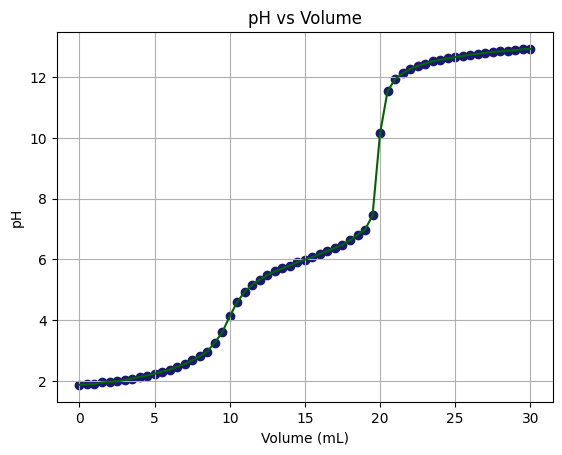

In [5]:
plt.scatter(vol,pH,c='midnightblue')
plt.plot(vol,pH,c='darkgreen')
plt.xlabel('Volume (mL)')
plt.ylabel('pH')
plt.title('pH vs Volume')
plt.grid(True)
plt.show()

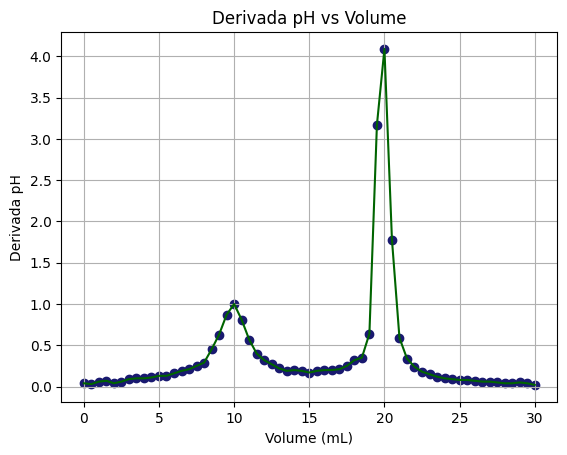

In [6]:
# Primera derivada
derivada = np.gradient(pH, vol)
derivada

plt.scatter(vol,derivada,c='midnightblue')
plt.plot(vol,derivada,c='darkgreen')
plt.xlabel('Volume (mL)')
plt.ylabel('Derivada pH')
plt.title('Derivada pH vs Volume')
plt.grid(True)
plt.show()

In [7]:
# peaks

from scipy.signal import find_peaks

peaks, _ = find_peaks(derivada, height=0)
peaks

array([ 3, 20, 28, 40, 58])

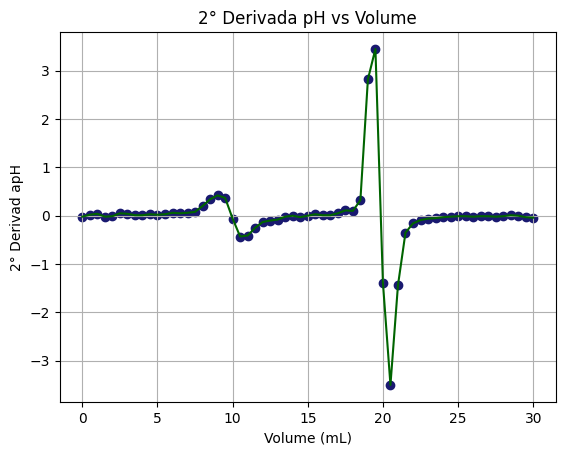

In [8]:
derivada2 = np.gradient(derivada, vol)
derivada2

plt.scatter(vol,derivada2,c='midnightblue')
plt.plot(vol,derivada2,c='darkgreen')
plt.xlabel('Volume (mL)')
plt.ylabel('2° Derivad apH')
plt.title('2° Derivada pH vs Volume')
plt.grid(True)
plt.show()

In [9]:
!pip install pint
!pip install pint uncertainties
import uncertainties
from uncertainties import ufloat
import pint as pint
ureg=pint.UnitRegistry(auto_reduce_dimensions=True)
Measurement=ureg.Measurement
Quantity=ureg.Quantity

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 2.1 MB/s eta 0:00:00


In [26]:
# Conecntración

M_ours = Quantity(0.0496, 'M')

#Dato pubChem
FM = Quantity(116.01095860, 'g/mol')

V = Quantity(0.5, 'L')

mass = Quantity(2.9,'g')

M_teo = mass/(V*FM)
M_teo = M_teo.to('M')

round(M_teo,6), M_ours

(<Quantity(0.049995, 'molar')>, <Quantity(0.0496, 'molar')>)

In [27]:
ErrM = 100- np.abs((M_teo-M_ours)/M_teo)*100
round(ErrM,2)

<Quantity(99.21, 'dimensionless')>

In [11]:
# Constantes grupales

pKa1_G = np.array([2.23, 2.15, 1.92, 2.2, 2.24, 2.24, 2.21])
pKa2_G = np.array([6.02, 5.94, 5.96, 5.9, 6.05, 5.99, 6.02])

Ka1_G = 10**(-pKa1_G)
Ka2_G = 10**(-pKa2_G)

meanKa1_G = np.mean(Ka1_G)
meanKa2_G = np.mean(Ka2_G)

desvKa1_G = np.std(Ka1_G)
desvKa2_G = np.std(Ka2_G)

In [38]:
np.round(Ka2_G,8)

array([9.50e-07, 1.15e-06, 1.10e-06, 1.26e-06, 8.90e-07, 1.02e-06,
       9.50e-07])

In [12]:
Ka1 = ufloat(meanKa1_G, desvKa1_G)
Ka2 = ufloat(meanKa2_G, desvKa2_G)

Ka1, Ka2

(0.006996408707675898+/-0.0020957140901166865,
 1.046869475984515e-06+/-1.1912953866951391e-07)

In [13]:
# Constantes obtenidas por nosostros

Ka1_ours = 10**(-pKa1_G[-2])
Ka2_ours = 10**(-pKa2_G[-2])

Ka1_ours, Ka2_ours

(np.float64(0.005754399373371567), np.float64(1.0232929922807537e-06))

In [14]:
# Datos de PubChem

Ka1_Teo = 10**(-1.94)
Ka2_Teo = 10**(-6.22)

Ka1_Teo, Ka2_Teo

(0.01148153621496883, 6.025595860743581e-07)

In [22]:
# % De error:

E1 = 100 - (np.abs((Ka1_Teo-Ka1.n))/Ka1_Teo)*100
E2 = 100 - (np.abs((Ka2_Teo-Ka2.n))/Ka2_Teo)*100

np.round(E1,2), np.round(E2,2)

(np.float64(60.94), np.float64(26.26))